In [2]:
from matplotlib import pyplot as plt
import numpy as np
import analysisFunctions as aF
from scipy import signal

## Opening and sorting data

In [3]:
path1 = r"C:\Users\gabri\Desktop\1_1500_av.csv"
path2 = r"C:\Users\gabri\Desktop\1501_end_av.csv"
data1 = np.loadtxt(path1, skiprows=1, delimiter=',')
data2 = np.loadtxt(path2, skiprows=1, delimiter=',')
data = np.concatenate((data1[1:, 1], data2[:, 1]))  # on skip le tout premier frame, noir

FPS = 40
nChannels = 4
endTime = (1/FPS) * data.shape[0]
timestamp = np.linspace(0, int(endTime), int(data.shape[0]/nChannels))


violet = data[0::4]
blue   = data[1::4]
green  = data[2::4]
red    = data[3::4]

violet[0:5] = np.mean(violet[5:])


## Plotting raw data

Text(0, 0.5, 'normalized intensity signal (-)')

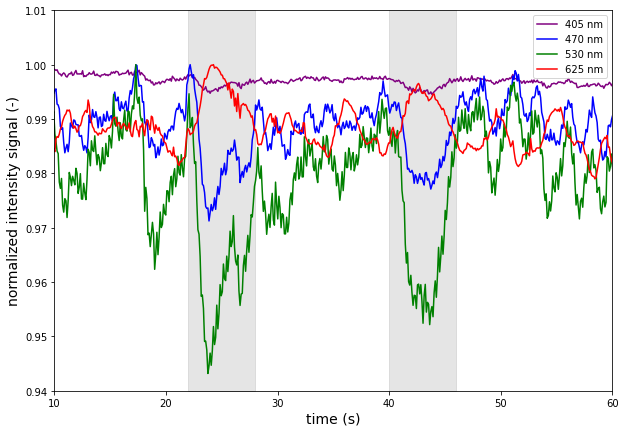

In [4]:

fig = plt.figure(figsize=(10,7))
plt.plot(timestamp, violet/np.max(violet), color='purple', label='405 nm')
plt.plot(timestamp, blue/np.max(blue), color='blue', label='470 nm')
plt.plot(timestamp, green/np.max(green), color='green', label='530 nm')
plt.plot(timestamp, red/np.max(red), color='red', label='625 nm')
plt.fill_between((22, 28), (0.94, 0.94), (1.01, 1.01), color='gray', alpha=0.2)
plt.fill_between((40, 46), (0.94, 0.94), (1.01, 1.01), color='gray', alpha=0.2)
plt.ylim(0.94, 1.01)
plt.xlim(10, 60)
plt.legend()
plt.xlabel("time (s)", fontsize=14)
plt.ylabel("normalized intensity signal (-)", fontsize=14)
# plt.savefig("prelim_results.png", dpi=600)


## Comparaison bleu, vert et mauve

Text(0, 0.5, 'normalized intensity signal (-)')

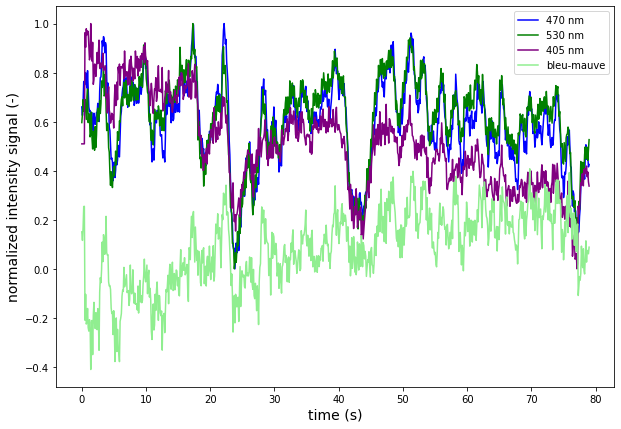

In [5]:
mod_blue = (blue - np.min(blue))/np.max(blue - np.min(blue))
mod_green = (green - np.min(green))/np.max(green - np.min(green))
mod_violet = (violet - np.min(violet))/np.max(violet - np.min(violet))
mod_red = (red - np.min(red))/np.max(red - np.min(red))

fig = plt.figure(figsize=(10, 7))
plt.plot(timestamp, mod_blue, color='blue', label='470 nm')
plt.plot(timestamp, mod_green, color='green', label='530 nm')
# plt.plot(timestamp, mod_blue - mod_green, color='deepskyblue', linestyle='--', label="blue-green")
plt.plot(timestamp, mod_violet, color='purple', label='405 nm')
# plt.plot(timestamp, mod_red, color='red', label='625 nm')
# plt.plot(timestamp, mod_blue - mod_green - mod_violet, color='orange', label='bleu-vert-mauve')
plt.plot(timestamp, mod_blue - mod_violet, color='lightgreen', label='bleu-mauve')
plt.legend()
plt.xlabel("time (s)", fontsize=14)
plt.ylabel("normalized intensity signal (-)", fontsize=14)
# plt.savefig("prelim_results_error_b-g.png", dpi=600)


## High pass filter

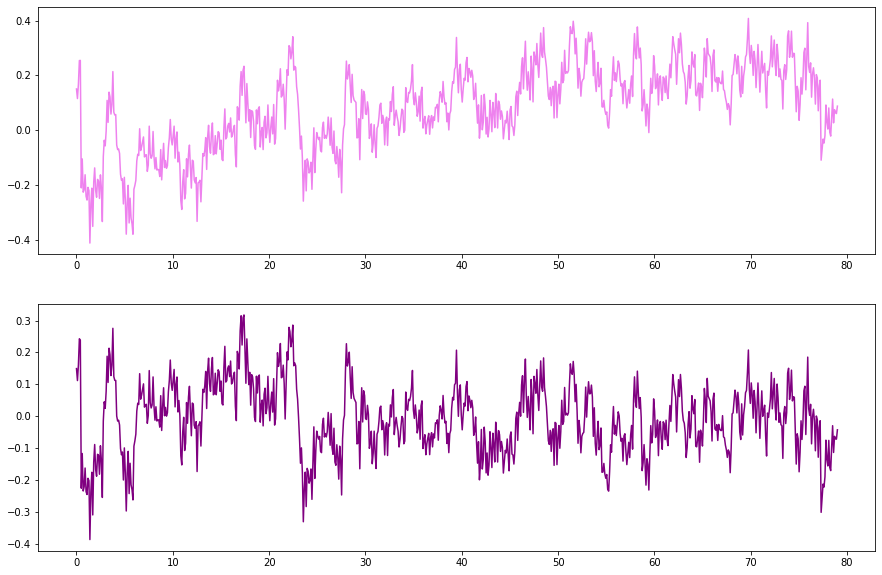

In [19]:
hemo_corr = mod_blue-mod_violet

sos = signal.butter(4, 0.05, btype='high', output='sos', fs=40)
f_hemo_corr = signal.sosfilt(sos, hemo_corr)

fig = plt.figure(figsize=(15, 10))

ax1 = plt.subplot(2, 1, 1)
plt.plot(timestamp, hemo_corr, color='violet', label='530 nm')
# plt.plot(timestamp, mod_red, color='red', label='625 nm')

ax2 = plt.subplot(2, 1, 2)
# plt.plot(timestamp, green, color='green', label='530 nm')
# plt.plot(timestamp, red, color='red', label='625 nm')
plt.plot(timestamp, f_hemo_corr, color='purple')
# plt.plot(timestamp, f_green)

### Filtre nécessaire?

## Réflectance

c:\Users\gabri\Documents\Université\Maitrise\Projet\Widefield-Imaging-Acquisition\analysisPipeline\analysisFunctions.py:57: RuntimeWarning: divide by zero encountered in log
  mu = (-1/X)* np.log(intensity/intensity[0])


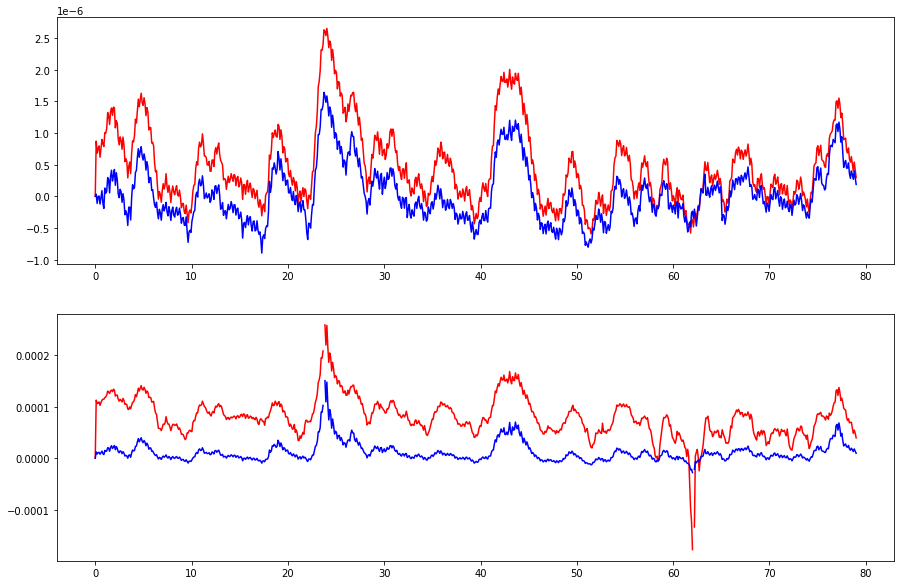

In [7]:
# %matplotlib qt 
%matplotlib inline
m_HbR, m_HbO = aF.oxygenation(mod_red, mod_green)
HbR, HbO = aF.oxygenation(red, green)

fig = plt.figure(figsize=(15, 10))

ax1 = plt.subplot(2, 1, 1)
ax1.plot(timestamp, HbO, 'r')
ax1.plot(timestamp, HbR, 'b')
# plt.xlim(60, 65)

ax2 = plt.subplot(2, 1, 2)
ax2.plot(timestamp, m_HbO, 'r')
ax2.plot(timestamp, m_HbR, 'b')
# plt.xlim(20, 25)
# print(m_HbO)
